In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()

In [4]:
df= pd.read_csv('Business_Analyst_cleaned.csv')


In [5]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'min', 'max', 'Min_Salary', 'Max_Salary', 'Avg_salary',
       'Job_state', 'Job_city', 'headquarters_city', 'Same_state_hq_jl', 'Age',
       'python_jd', 'Sql', 'aws', 'visualization', 'Project_Management',
       'Excel', 'Hadoop', 'Machine Learning', 'Ai', 'Unstructured Data',
       'java', 'communication'],
      dtype='object')

In [16]:
def title_simplifier(title):
    if 'business' in title.lower():
        return 'Business Analyst'
   
    elif ' science ' in title.lower() or 'scientist' in title.lower ():
        return 'Data Scientist'
    elif 'machine' in title.lower():
        return 'Machine Learning'
    elif 'manager'in title.lower():
        return 'manager'
    elif 'consultant' in title.lower() or 'consultancy' in title.lower():
        return 'Business Consultant'
    elif 'marketing' in title.lower():
        return 'Marketing Specialist'
    elif 'finance' in title.lower():
        return 'finance analyst'
    elif ' system' in title.lower():
        return 'system analyst'
    
    
        
    elif 'director' in title.lower():
        return 'Director'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'quantitative' in title.lower():
        return 'quantitative analyst'
    elif 'engineer' in title.lower():
        return 'Data Engineer'
    elif 'intelligence' in title.lower():
        return 'Intelligence Analyst'
    
    elif 'operations' in title.lower():
        return 'operations analyst'
    elif 'marketing' in title.lower():
        return 'marketing analyst'
#     else :
#         return 'Na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'Junior' in title.lower() or 'junior' in title.lower():
        return 'junior'
#     else :
#         return 'na'
    

In [17]:
df['job_simplifier'] = df['Job Title'].apply(title_simplifier) 


In [10]:
df.job_simplifier.value_counts()

Business Analyst        2447
data analyst             266
operations analyst        43
system analyst            40
Business Consultant       34
Marketing Specialist      31
Data Scientist             9
Data Engineer              6
manager                    6
Intelligence Analyst       5
quantitative analyst       4
finance analyst            4
Director                   1
Name: job_simplifier, dtype: int64

In [18]:
df['Seniority'] = df['Job Title'].apply(seniority)
df.Seniority.value_counts(dropna = False)

NaN       3102
senior     525
junior      63
Name: Seniority, dtype: int64

In [19]:
df['Job_state']= df.Job_state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'CO')
df.Job_state.value_counts() 

TX             1352
CA             1014
AZ              339
IL              328
PA              275
NY              255
NJ               89
DE               37
Los Angeles       1
Name: Job_state, dtype: int64

In [20]:
df['desc_len'] = df['Job Description'].apply(lambda x : len(x))


In [21]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= -1 else 0)


In [23]:
df['Min_salary_hr']= df['Min_Salary'].div(2)

In [24]:
df['Max_salary_hr']= df['Max_Salary'].div(2)

In [25]:
df['avg_salary_hr'] = df['Avg_salary'].div(2)

In [26]:
df.describe()


,Unnamed: 0,Rating,Founded,min,max,Min_Salary,Max_Salary,Avg_salary,Same_state_hq_jl,Age,...,Machine Learning,Ai,Unstructured Data,java,communication,desc_len,Competitors_count,Min_salary_hr,Max_salary_hr,avg_salary_hr
count,3690.000000,3690.000000,3690.000000,3690.000000,3690.00000,3690.000000,3690.00000,3690.000000,3690.000000,3690.000000,...,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000
mean,1844.500000,3.352276,1470.466667,56.242547,98.97832,56.242547,98.97832,77.610434,0.270461,31.156098,...,0.018699,0.916802,0.009214,0.050407,0.588076,3291.756640,1.468022,28.121274,49.489160,38.805217
std,1065.355574,1.476698,865.015983,20.578908,32.84257,20.578908,32.84257,25.528285,0.444258,44.097215,...,0.135479,0.276218,0.095560,0.218812,0.492248,1876.355064,0.816728,10.289454,16.421285,12.764143
min,0.000000,-1.000000,-1.000000,27.000000,48.00000,27.000000,48.00000,37.500000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,13.500000,24.000000,18.750000
25%,922.250000,3.200000,-1.000000,41.000000,78.00000,41.000000,78.00000,60.500000,0.000000,-1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1952.750000,1.000000,20.500000,39.000000,30.250000
50%,1844.500000,3.700000,1983.000000,49.000000,87.00000,49.000000,87.00000,70.000000,0.000000,18.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,3066.500000,1.000000,24.500000,43.500000,35.000000
75%,2766.750000,4.100000,2002.000000,69.000000,112.00000,69.000000,112.00000,89.000000,1.000000,36.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,4295.750000,2.000000,34.500000,56.000000,44.500000
max,3689.000000,5.000000,2020.000000,124.000000,226.00000,124.000000,226.00000,172.500000,1.000000,330.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,18156.000000,4.000000,62.000000,113.000000,86.250000


<AxesSubplot:>

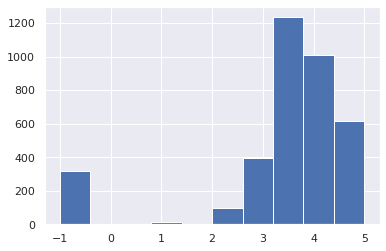

In [27]:
df.Rating.hist()

<AxesSubplot:>

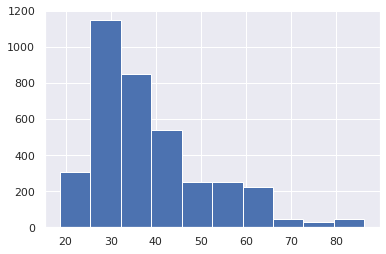

In [28]:
df.avg_salary_hr.hist()

<AxesSubplot:>

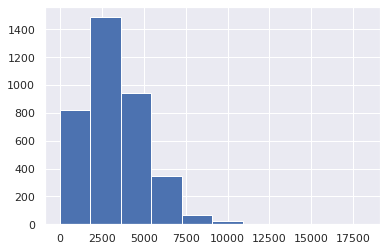

In [29]:
df.desc_len.hist()

In [30]:
df[['Age', 'avg_salary_hr', 'Rating', 'desc_len']].corr()

,Age,avg_salary_hr,Rating,desc_len
Age,1.000000,-0.060997,0.138655,0.286275
avg_salary_hr,-0.060997,1.000000,0.035631,-0.071095
Rating,0.138655,0.035631,1.000000,-0.013825
desc_len,0.286275,-0.071095,-0.013825,1.000000


<AxesSubplot:>

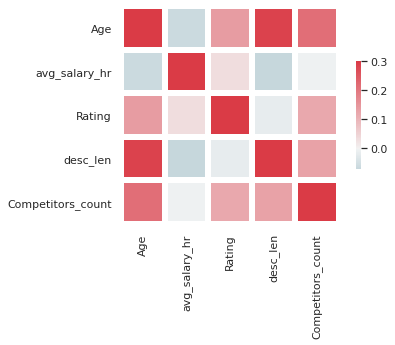

In [31]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Age', 'avg_salary_hr', 'Rating', 'desc_len','Competitors_count']].corr(), vmax=.3, center=0, cmap=cmap,square=True, linewidth=5, cbar_kws={"shrink":.5})

In [32]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'min', 'max', 'Min_Salary', 'Max_Salary', 'Avg_salary',
       'Job_state', 'Job_city', 'headquarters_city', 'Same_state_hq_jl', 'Age',
       'python_jd', 'Sql', 'aws', 'visualization', 'Project_Management',
       'Excel', 'Hadoop', 'Machine Learning', 'Ai', 'Unstructured Data',
       'java', 'communication', 'job_simplifier', 'Seniority', 'desc_len',
       'Competitors_count', 'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr'],
      dtype='object')

In [33]:
df_variables= df[['Location','Headquarters','Size','Type of ownership','Industry', 'Sector', 'Revenue', 'Job_state',
       'Job_city', 'headquarters_city','Same_state_hq_jl',
        'Seniority' , 'Company Name', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
        'Competitors_count']]

graphs for Location: total= 20


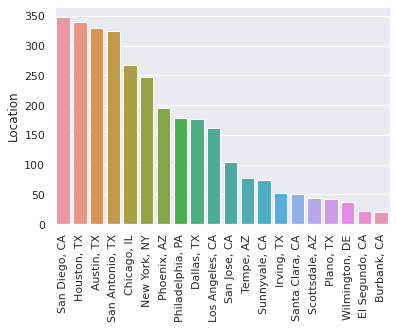

graphs for Headquarters: total= 20


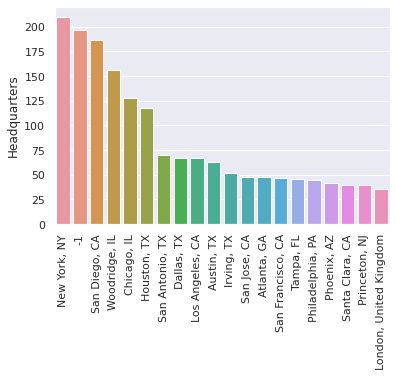

graphs for Size: total= 9


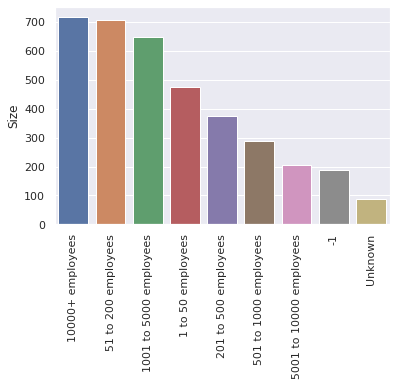

graphs for Type of ownership: total= 15


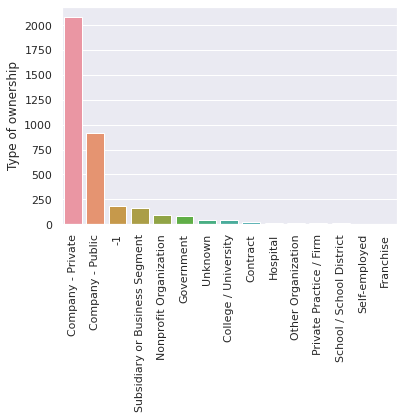

graphs for Industry: total= 20


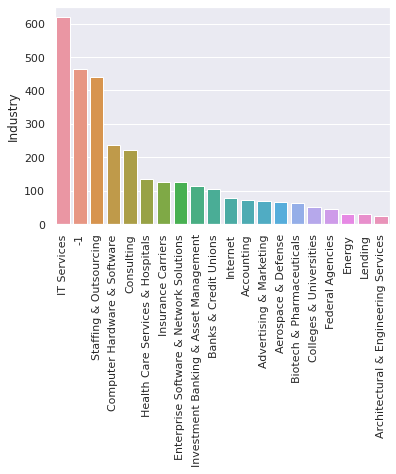

graphs for Sector: total= 20


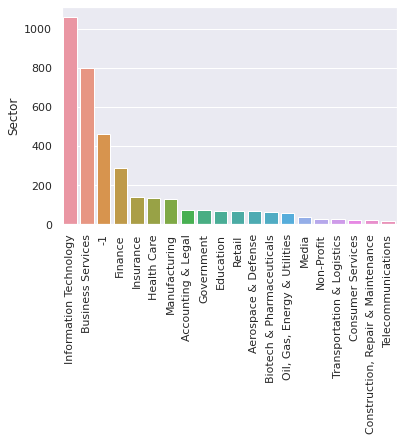

graphs for Revenue: total= 14


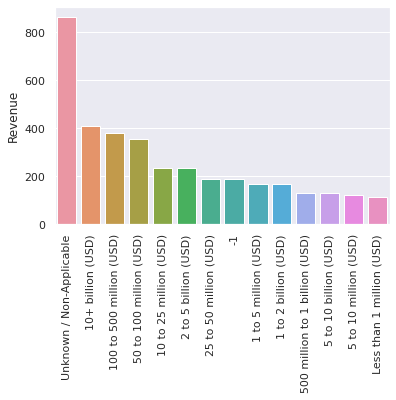

graphs for Job_state: total= 9


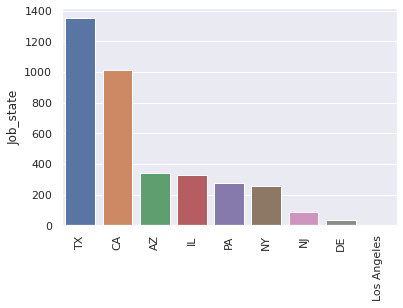

graphs for Job_city: total= 20


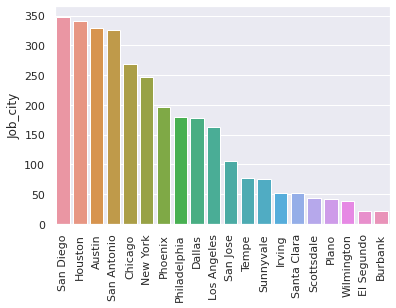

graphs for headquarters_city: total= 20


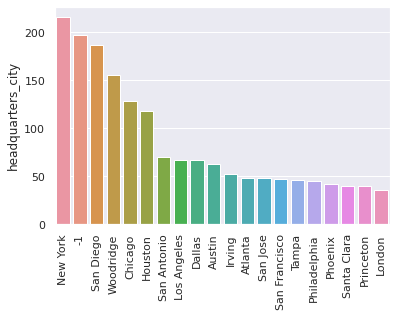

graphs for Same_state_hq_jl: total= 2


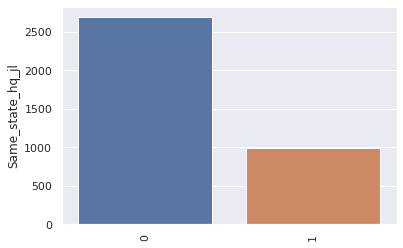

graphs for Seniority: total= 2


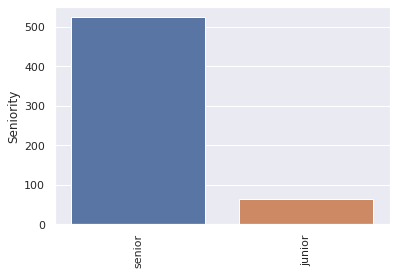

graphs for Company Name: total= 20


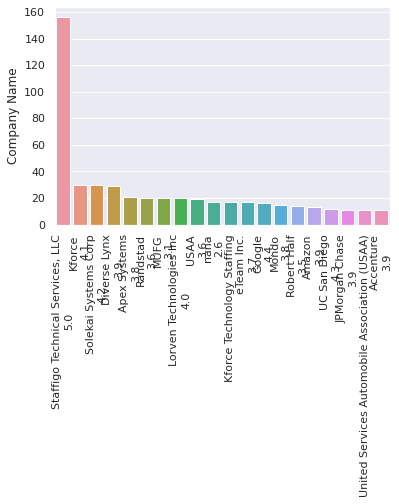

graphs for python_jd: total= 2


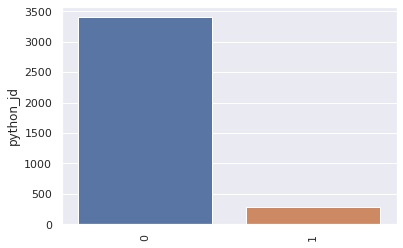

graphs for Sql: total= 2


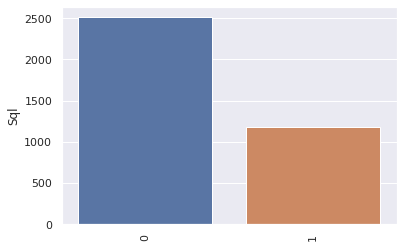

graphs for aws: total= 2


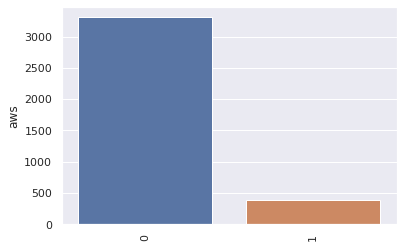

graphs for visualization: total= 2


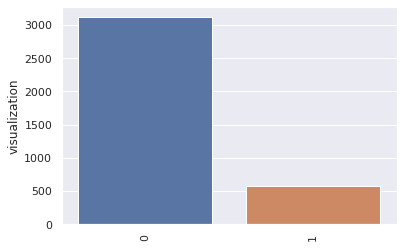

graphs for Project_Management: total= 2


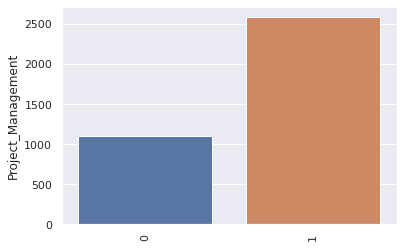

graphs for Excel: total= 2


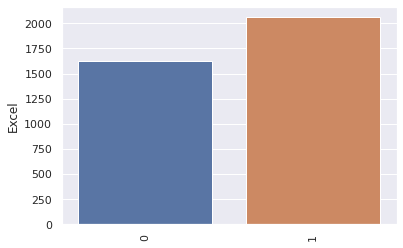

graphs for Hadoop: total= 2


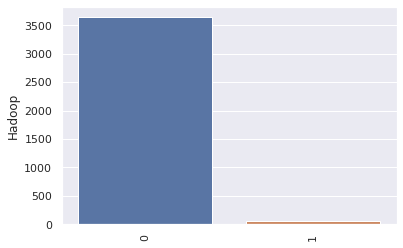

graphs for Machine Learning: total= 2


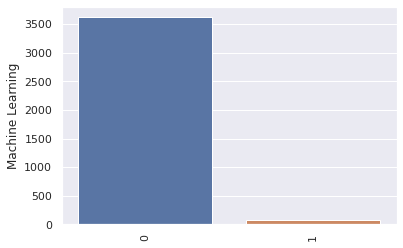

graphs for Ai: total= 2


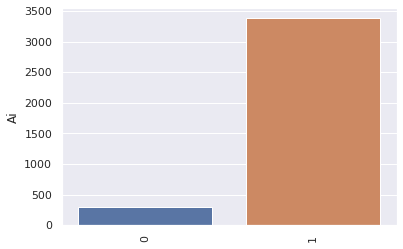

graphs for Unstructured Data: total= 2


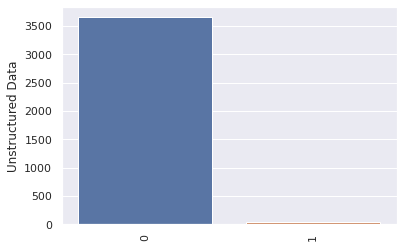

graphs for communication: total= 2


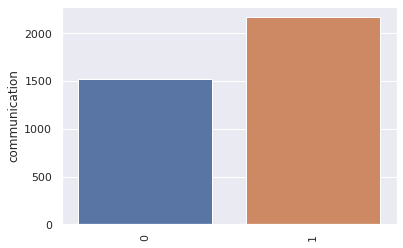

graphs for Competitors_count: total= 4


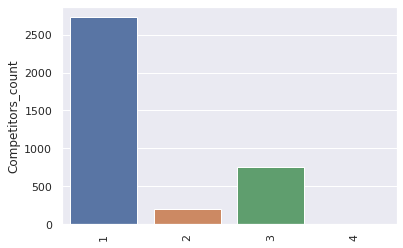

In [35]:
for i in df_variables[['Location','Headquarters','Size','Type of ownership','Industry', 'Sector', 'Revenue', 'Job_state',
       'Job_city', 'headquarters_city','Same_state_hq_jl',
        'Seniority' , 'Company Name', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Competitors_count' ]].columns:
    cat_num = df_variables[i].value_counts()[:20]
    print("graphs for %s: total= %d" % (i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [36]:
pd.pivot_table(df, index=['job_simplifier','Seniority'], values='Avg_salary' )

Avg_salary
job_simplifier       Seniority            
Business Analyst     junior      80.125000
                     senior      78.258312
Business Consultant  senior      74.147059
Data Engineer        senior      96.000000
Data Scientist       senior      60.500000
Intelligence Analyst senior      72.500000
Marketing Specialist senior      55.000000
data analyst         junior      71.055556
                     senior      77.250000
finance analyst      junior      59.000000
                     senior      51.500000
manager              senior      92.500000
operations analyst   junior      54.500000
                     senior      74.500000
quantitative analyst senior      48.500000
system analyst       junior      59.500000
                     senior      62.000000

In [37]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df, index=['Job_state','Job_city', 'job_simplifier'], values='Avg_salary' ).sort_values('Job_state', ascending= False)

Avg_salary
Job_state   Job_city             job_simplifier                  
TX          University Park      Business Analyst       70.500000
            Coppell              Business Analyst       72.000000
            Houston              Business Consultant    67.500000
                                 Business Analyst       63.138021
            Highland Park        Business Analyst       58.000000
            Grapevine            Business Analyst       73.250000
            Grand Prairie        Business Analyst       70.333333
            Garland              Business Analyst       75.000000
            Fort Sam Houston     operations analyst     77.500000
            Flower Mound         Business Analyst       67.500000
            Dallas               operations analyst     76.000000
                                 data analyst           85.454545
                                 Marketing Specialist   80.500000
                                 Intelligence Analyst   70.500000
                                 Business Consultant    57.000000
                                 Business Analyst       72.647059
            Carrollton           Business Analyst       70.500000
            Houston              Marketing Specialist   58.500000
            Boerne               Business Analyst       50.000000
            Bedford              Business Analyst       58.000000
            Austin               system analyst         69.250000
                                 operations analyst     62.812500
                                 manager                64.000000
                                 data analyst           67.521739
                                 Marketing Specialist   68.750000
                                 Director               80.500000
                                 Data Engineer          83.000000
                                 Business Consultant    76.833333
                                 Business Analyst       65.497706
            Arlington            Business Analyst       73.700000
            Allen                Business Analyst       59.000000
            Addison              Business Analyst       80.750000
            Houston              Intelligence Analyst   65.500000
            Dallas               quantitative analyst   67.500000
            Houston              data analyst           60.425926
            Round Rock           Business Analyst       64.400000
            Stafford             data analyst           62.000000
            Spring               Business Analyst       60.833333
            South Houston        Business Analyst       49.000000
            San Antonio          system analyst         59.583333
                                 quantitative analyst   48.500000
            Houston              finance analyst        51.500000
            San Antonio          finance analyst        61.000000
                                 data analyst           62.611111
                                 Marketing Specialist   72.500000
                                 Intelligence Analyst   66.000000
                                 Data Scientist         75.000000
                                 Data Engineer          55.500000
                                 Business Consultant    61.000000
                                 Business Analyst       66.201613
                                 operations analyst     69.500000
            Richardson           Data Scientist         63.500000
            Lewisville           Business Analyst       73.250000
            Richardson           Business Analyst       69.222222
            Houston              manager                86.000000
                                 operations analyst     71.800000
            Irving               Business Analyst       72.964286
                                 data analyst           62.000000
            Lackland AFB         data analyst           53.500000
            Houston          

In [38]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df[df.job_simplifier == 'Business Analyst'], index='Job_state', values='Avg_salary', aggfunc='count' ).sort_values('Job_state', ascending= False)

,Avg_salary
Job_state,
TX,787
PA,194
NY,227
NJ,75
Los Angeles,1
IL,245
DE,33
CA,671
AZ,214


In [39]:
df['Rating_groups']= pd.cut(df['Rating'], bins = [0,1,2,3,4,5])

<AxesSubplot:xlabel='Rating_groups'>

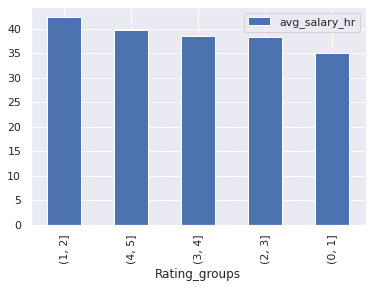

In [40]:
df.groupby(['Rating_groups'])['avg_salary_hr'].mean().reset_index().sort_values('avg_salary_hr', ascending = False).set_index('Rating_groups').plot(kind = 'bar')

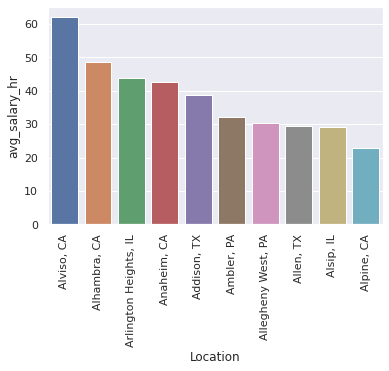

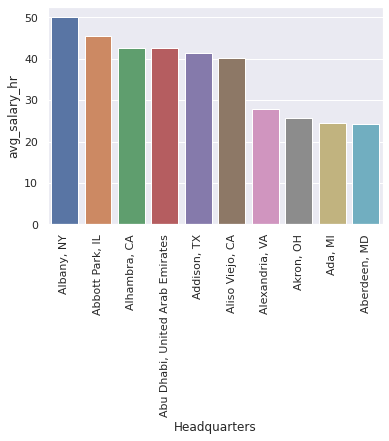

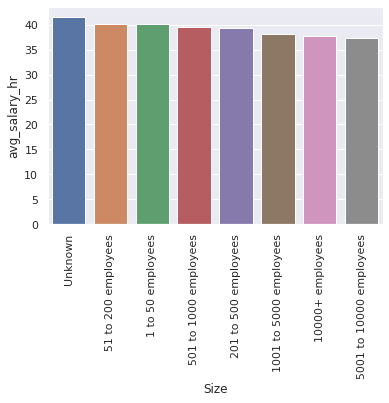

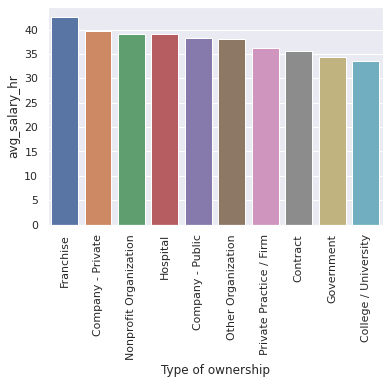

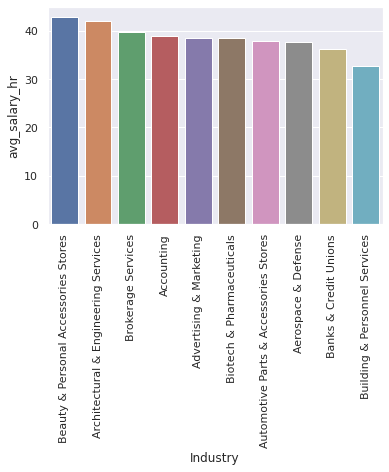

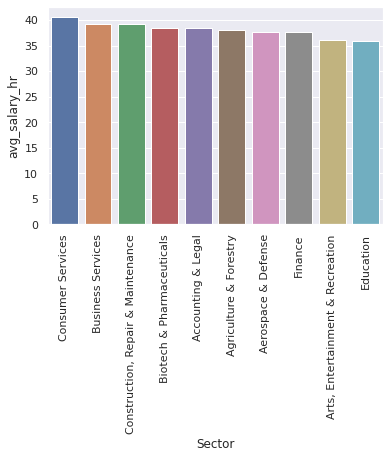

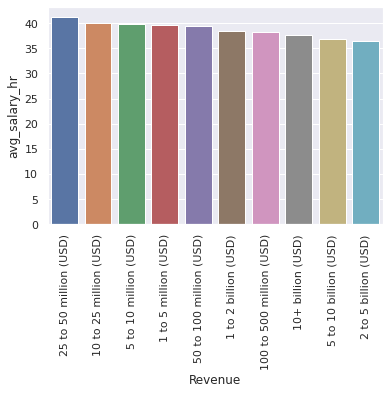

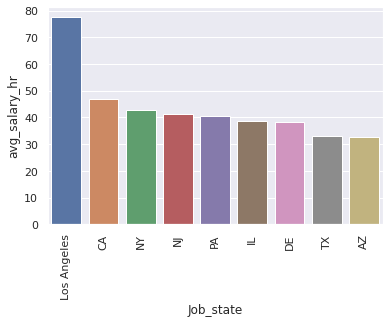

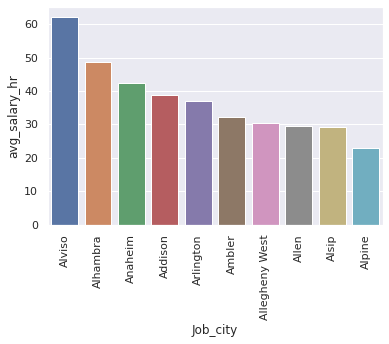

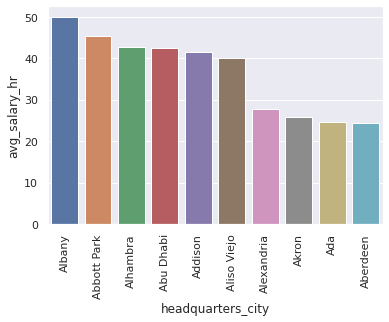

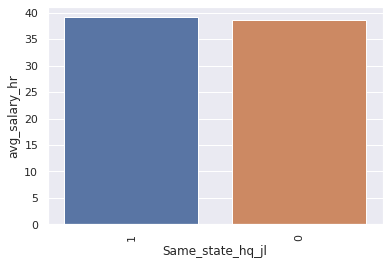

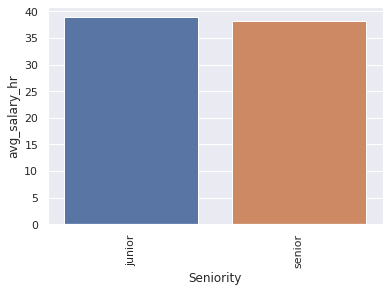

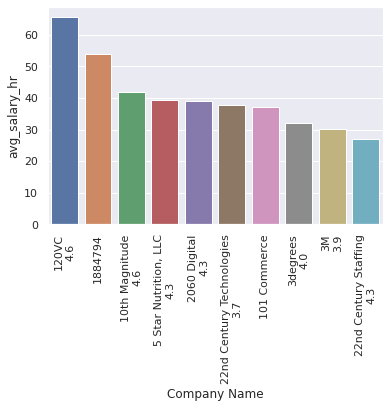

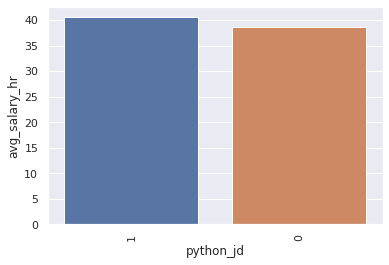

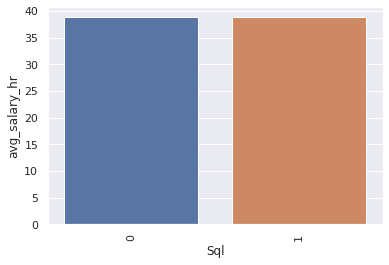

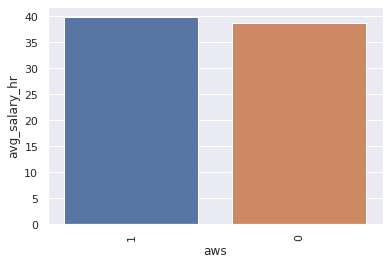

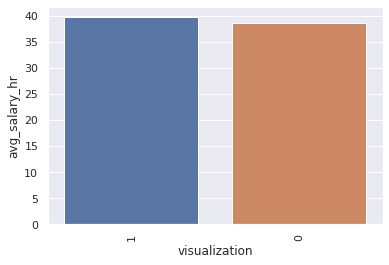

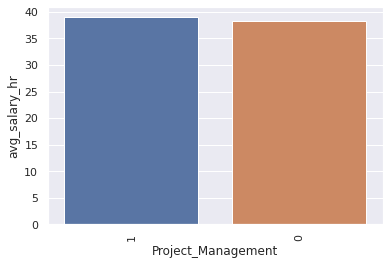

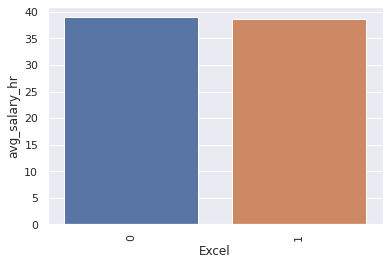

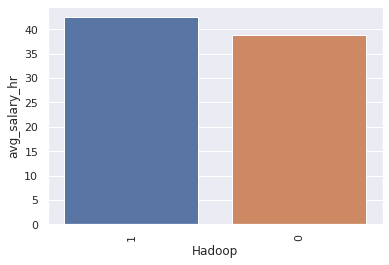

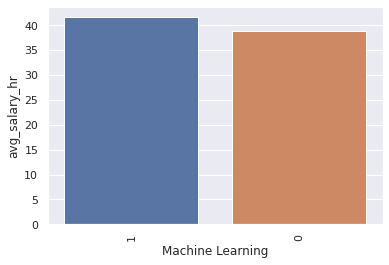

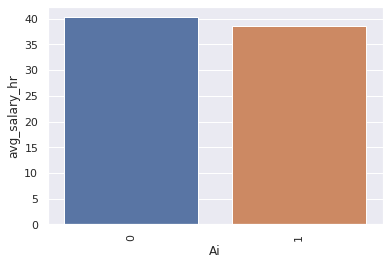

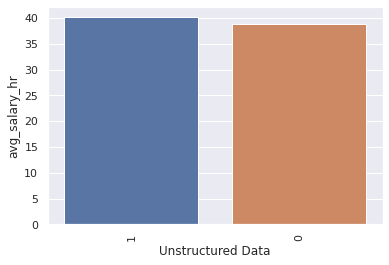

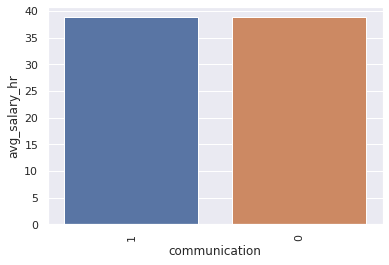

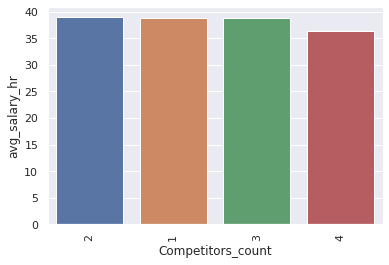

In [41]:
for i in [i for i in df_variables.columns.tolist() if i != 'avg_salary_hr']:
    k = 'avg_salary_hr'
    df_2 = df[(df[i].astype(str) != '-1')]
    chart_df = df_2.groupby([i])[k].mean().reset_index()[:10].sort_values(k, ascending = False).set_index(i)
    chart_df.index = chart_df.index.astype('str')
    chart= sns.barplot(x=chart_df.index, y=chart_df[k])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [6]:
from wordcloud import WordCloud, ImageColorGenerator , STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

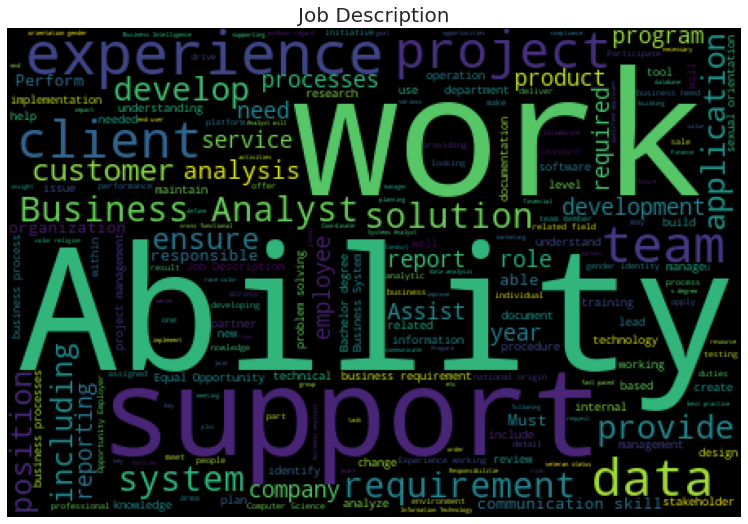

In [43]:
JobDescription=df['Job Description'][~pd.isnull(df['Job Description'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(JobDescription))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job Description'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [44]:
df.to_csv("Data_Scientist_cleaned.csv")

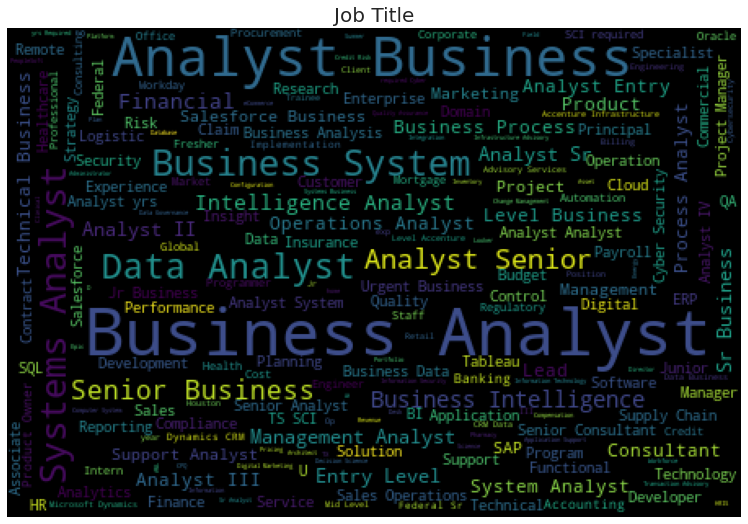

In [7]:
JobTitle=df['Job Title'][~pd.isnull(df['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(JobTitle))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()